In [25]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

wines = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\PCA\\wine.csv",header=0)

# Considering only numerical data 
features_wines = wines.iloc[:,1:]
# Normalizing the numerical data 
features_wines_normal = scale(features_wines)
pca = PCA(n_components = 10)
pca_wines = pca.fit_transform(features_wines_normal)

In [26]:
# The amount of variance that each PCA explains is 
info = pca.explained_variance_ratio_
info
#Each component is of n-dimensional vector
#pca.components_[0]

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [27]:
# Cumulative variance 
cumulative_info = np.cumsum(np.round(info,decimals = 4)*100)
cumulative_info

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34, 92.02, 94.24,
       96.17])

In [28]:
pca_features=pd.DataFrame(data = pca_wines, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df = pd.concat([pca_features, wines[['Type']]], axis = 1)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1
...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,3


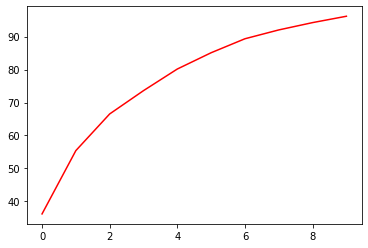

In [29]:
# Variance plot for PCA components obtained 
plt.plot(cumulative_info,color="red")

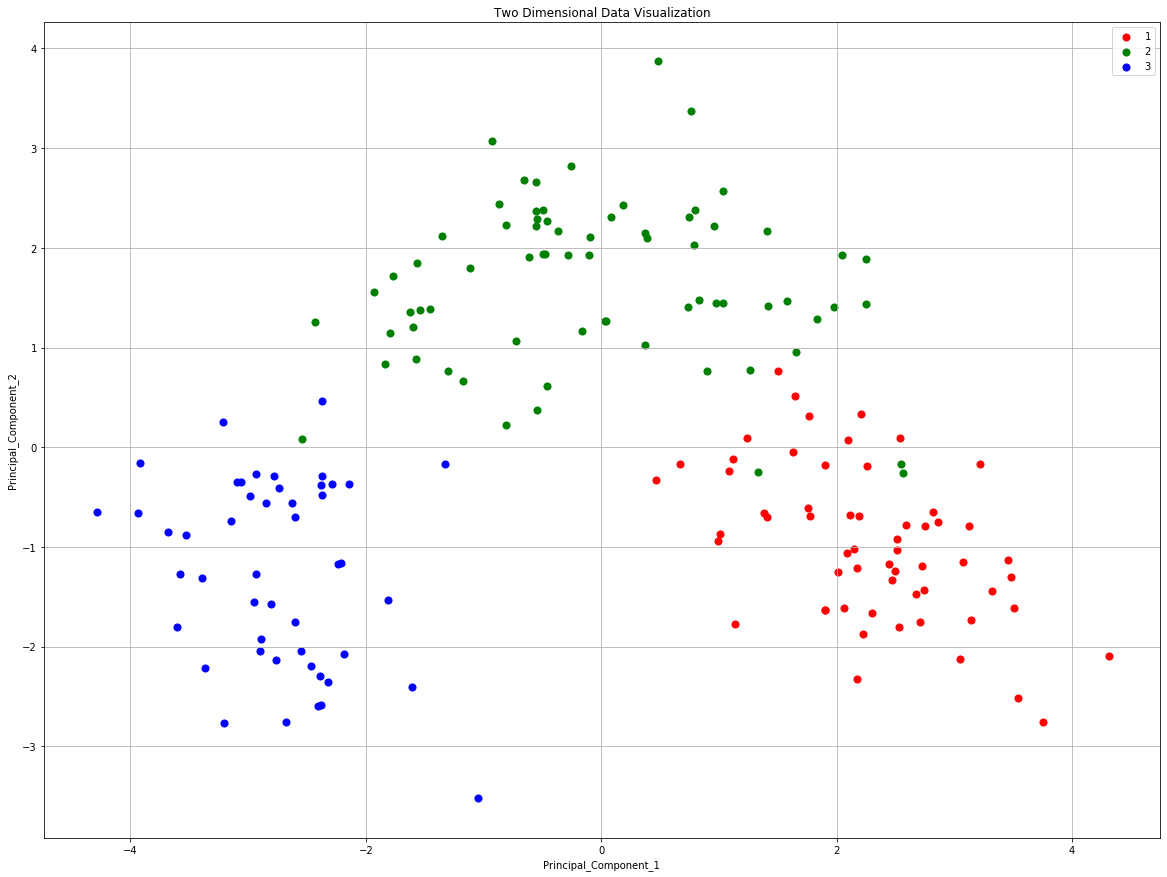

In [30]:
# Plot between PCA1 and PCA2 
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal_Component_1')
ax.set_ylabel('Principal_Component_2')
ax.set_title('Two Dimensional Data Visualization')
types = [1,2,3]
colors = ['r', 'g', 'b']
for type,color in zip(types,colors):
    indicesToKeep = pca_df['Type'] == type
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'],pca_df.loc[indicesToKeep, 'PC2'],c = color,s = 50)
ax.legend(types)
ax.grid()

In [31]:
###### screw plot or elbow curve ############
kclusters = list(range(2,11))
TWSS = [] # variable for storing total within sum of squares for each kmeans 

for i in kclusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_features)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(pca_features.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,pca_features.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

Text(0.5, 1.0, 'Screw Plot or Elbow Curve for Determining appropriate Clusters')

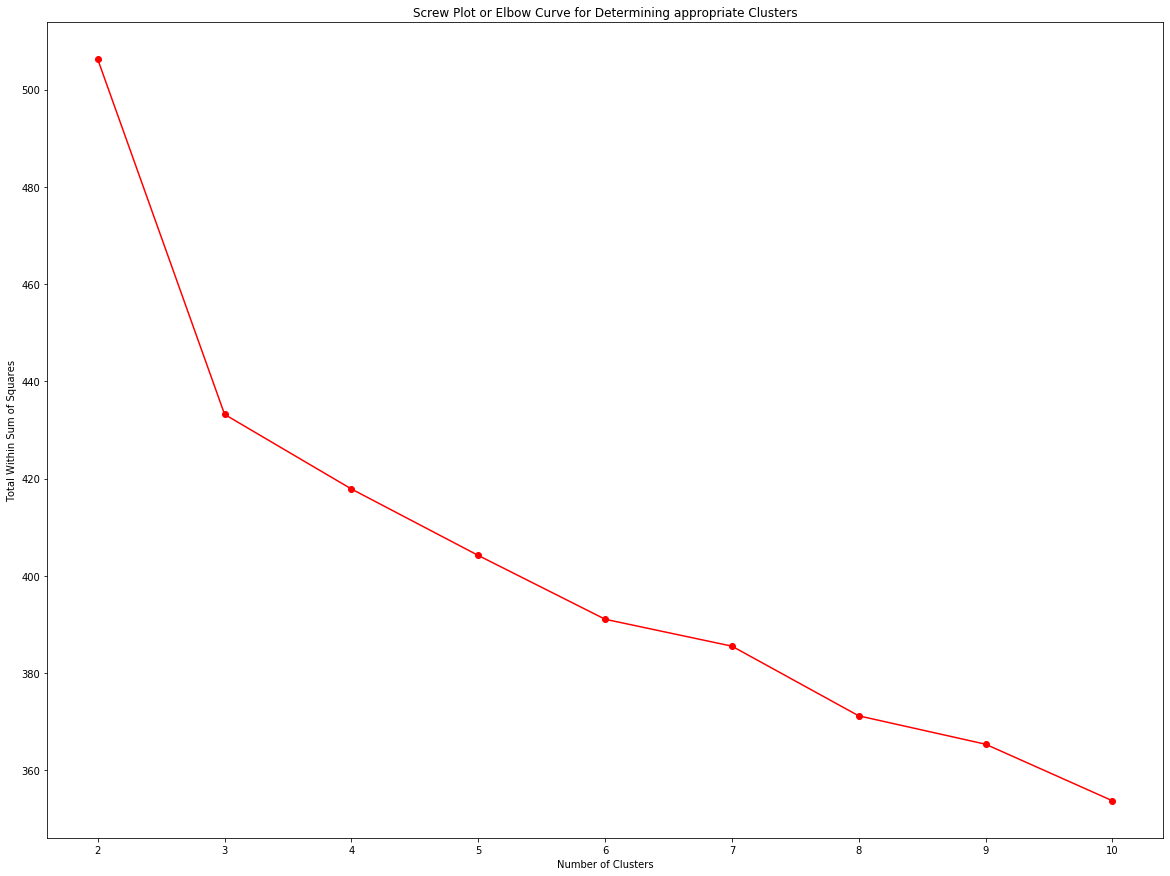

In [32]:
plt.figure(figsize=(20,15))
plt.plot(kclusters,TWSS, 'ro-');
plt.xlabel("Number of Clusters");
plt.ylabel("Total Within Sum of Squares");
plt.xticks(kclusters)
plt.title('Screw Plot or Elbow Curve for Determining appropriate Clusters')